In [1]:
#Adds higher directory to path, so we can access /ATS
import sys
sys.path.append("../")

from ATS.general import *
from ATS.QAQC import *

import pandas as pd
from datetime import timedelta
import datetime as dt
import numpy as np
import matplotlib.pyplot as plt

# Set the DataFram in pandas to show all columns and 1000 rows. Display plots inline
pd.options.display.max_columns = None

pd.set_option('display.max_rows', 1000)

2021-10-28 19:38:09.376117: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcudart.so.11.0'; dlerror: libcudart.so.11.0: cannot open shared object file: No such file or directory
2021-10-28 19:38:09.376172: I tensorflow/stream_executor/cuda/cudart_stub.cc:29] Ignore above cudart dlerror if you do not have a GPU set up on your machine.


# Load and Subset Data

<Item title:"SAC_Fish_Passage" type:Feature Layer Collection owner:Anooshi>
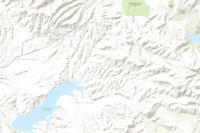

In [2]:
# Load data from arcGIS online
output = arcGIS_data_load('f1a098a737c441eba023470de8359382')

data = output['data0']
feature_service = output['feature_service']

In [3]:
data.head()

,OBJECTID,Date,Surveyor1,Surveyor2,FeatureDescription,BarrierType,MeasuredBarrierHeight,MeasuredWaterDepth,FishSpecies1,Quantity1,AgeRange1,Health1,PhysicalBehavior1,FishSpecies2,Quantity2,AgeRange2,Health2,PhysicalBehavior2,MeasuredCreekFlow,VerticalDrop,HorizontalDistance,WaterDepthTakeoff,WaterDepthLanding,CurrentFlowRate,SizeClass1,SizeClass2,OverallRec,OtherBarrierType,GlobalID,BHRSite,FeatureName,FishSpecies,FishSpeciesCommonName,PoolLength,PoolWidth,PoolDepth,Comments2,Surveyor3,SHAPE
0,8,2018-02-17 17:20:00,Marina Olson,Patrick Kobernus,Mouth of Reservoir,Other,None,None,None,NaN,None,None,None,None,NaN,None,None,None,0.07,None,None,None,None,0.07,None,None,None,Shallow creek inlets.,cedc8fcc-d757-4b94-9c39-36302e7e246c,SAC,Start or End of Survey,None,None,NaN,NaN,NaN,"Shallow marsh edge of reservoir, water depth i...",Rusty Hutto,"{""x"": 6182568.146728896, ""y"": 2038050.95668627..."
1,9,2018-02-17 17:47:07,Marina Olson,Patrick Kobernus,Mid-Channel Pool,None,None,None,None,NaN,None,None,None,None,NaN,None,None,None,0.07,None,None,None,None,0.07,None,None,None,None,42acf373-472b-4512-bada-41e6a8a8023e,SAC,Pool with No Fish Present,None,None,NaN,NaN,NaN,One adult male western pond turtle observed in...,Rusty Hutto,"{""x"": 6183006.227874826, ""y"": 2037721.49997080..."
2,10,2018-02-17 18:08:14,Marina Olson,Patrick Kobernus,Mid-Channel Pool,None,None,None,None,NaN,None,None,None,None,NaN,None,None,None,0.07,None,None,None,None,0.07,None,None,None,None,da46344d-87fe-4dc8-97b5-9048287c7f80,SAC,Pool with No Fish Present,None,None,NaN,NaN,NaN,Flow is better and faster here; water is still...,Rusty Hutto,"{""x"": 6183444.617416277, ""y"": 2037292.62562408..."
3,11,2018-02-17 18:26:24,Marina Olson,Patrick Kobernus,Rock Cross Vane Structure,NotApplicable,None,None,None,NaN,None,None,None,None,NaN,None,None,None,0.07,None,None,None,None,0.07,None,None,None,None,06cb6417-fa31-4c45-904a-cdcd2cc088dc,SAC,Pool with No Fish Present,None,None,NaN,10.0,0.8,"No longer a pool, more like a run. Pool is 10 ...",Rusty Hutto,"{""x"": 6184015.454053313, ""y"": 2036992.89444465..."
4,12,2018-02-17 18:38:38,Marina Olson,Patrick Kobernus,Backwater Pool,Other,None,None,None,NaN,None,None,None,None,NaN,None,None,None,0.07,None,None,None,None,0.07,None,None,None,Willow/sandbar barrier.,74e8d1fc-7f60-4271-bac0-2d4145079191,SAC,Pool with No Fish Present,None,None,40.0,6.0,1.0,Willows and rock from creek has created multip...,Rusty Hutto,"{""x"": 6184238.400067773, ""y"": 2036953.69671088..."


In [4]:
# Subset data for desired year.
data.rename(columns={"Date": "Observation_Date"}, inplace=True)
sYear = input("Start Year? (YYYY)")
sub = year_subset(data,sYear)

Start Year? (YYYY) 2020

Analysis for 2020-10-01 07:00 UTC to 2021-10-01 07:00 UTC
Entries in Subset: 40


# QAQC

In [5]:
validate_domains(feature_service)



Table/Layer:  SAC_Fish_Passage


No Mismatches Found


In [6]:
QAQC_whitespace(data, exclude_cols=['Comments2','PhysicalBehavior2','PhysicalBehavior1','FeatureDescription', 'OtherBarrierType'])

Name of Object ID Column:  ['OBJECTID']


Analysis for: BarrierType
No \xa0 characters found
No double spaces found
No triple spaces found
No trailing white space found


Analysis for: AgeRange1
No \xa0 characters found
No double spaces found
No triple spaces found
No trailing white space found


Analysis for: FishSpecies2
No \xa0 characters found
No double spaces found
No triple spaces found
No trailing white space found


Analysis for: WaterDepthTakeoff
No \xa0 characters found
No double spaces found
No triple spaces found
No trailing white space found


Analysis for: AgeRange2
No \xa0 characters found
No double spaces found
No triple spaces found
No trailing white space found


Analysis for: OverallRec
No \xa0 characters found
No double spaces found
No triple spaces found
No trailing white space found


Analysis for: FishSpecies
No \xa0 characters found
No double spaces found
No triple spaces found
No trailing white space found


Analysis for: FishSpeciesCommonName
No \xa0 character

In [7]:
#QAQC Check number of records matches on ArcGIS online
print('Subset \n# of rows:\n', sub.shape[0])
print('# of columns:\n',sub.shape[1])

Subset 
# of rows:
 40
# of columns:
 39


In [8]:
# QAQC Find blank entries in specific columns
find_blank_entries(data, exclude_cols=['AgeRange1','Health2','FishSpecies','HorizontalDistance','PoolWidth','PoolDepth',
                                      'VerticalDrop','PoolLength','PhysicalBehavior2','AgeRange2','PhysicalBehavior1',
                                      'WaterDepthTakeoff','MeasuredWaterDepth','FishSpeciesCommonName','OtherBarrierType',
                                      'SizeClass2','OverallRec','Comments2','FishSpecies2','Health1','FishSpecies1',
                                      'MeasuredCreekFlow','Quantity1','WaterDepthLanding','FeatureDescription','SizeClass1',
                                      'BarrierType','MeasuredBarrierHeight','Quantity2','FeatureName','CurrentFlowRate'])

No blank SHAPE
No blank Observation_Date
No blank Surveyor1
No blank OBJECTID
No blank GlobalID
No blank Surveyor2
No blank BHRSite
No blank Surveyor3


In [9]:
sub

,OBJECTID,Observation_Date,Surveyor1,Surveyor2,FeatureDescription,BarrierType,MeasuredBarrierHeight,MeasuredWaterDepth,FishSpecies1,Quantity1,AgeRange1,Health1,PhysicalBehavior1,FishSpecies2,Quantity2,AgeRange2,Health2,PhysicalBehavior2,MeasuredCreekFlow,VerticalDrop,HorizontalDistance,WaterDepthTakeoff,WaterDepthLanding,CurrentFlowRate,SizeClass1,SizeClass2,OverallRec,OtherBarrierType,GlobalID,BHRSite,FeatureName,FishSpecies,FishSpeciesCommonName,PoolLength,PoolWidth,PoolDepth,Comments2,Surveyor3,SHAPE
135,154,2021-03-12 18:54:32,Brian Creeks,Kevin Sherrill,Pool downstream of cascade.,None,None,None,None,NaN,None,None,None,None,NaN,None,None,None,NaN,None,None,None,None,NaN,None,None,None,None,7f8c9598-8616-47b1-96be-67ec95c2c940,SAC,Start or End of Survey,None,None,20.0,5.0,1.50,Start of survey at this location. Water temperature at bottom is 1...,Patrick Kobernus,"{""x"": 6191787.792042663, ""y"": 2034689.1349392694, ""spatialReferenc..."
136,155,2021-03-12 19:21:59,Kevin Sherrill,Brian Creeks,Glide,None,None,None,None,NaN,None,None,None,None,NaN,None,None,None,NaN,None,None,None,None,NaN,None,None,None,None,f7cf58d4-c333-47ee-831d-326e7d97ec1b,SAC,None,None,None,10.0,4.0,1.00,Glide with potential rainbow trout redd location.,Patrick Kobernus,"{""x"": 6192049.600603847, ""y"": 2034828.9052856367, ""spatialReferenc..."
137,156,2021-03-12 19:27:57,Kevin Sherrill,Brian Creeks,None,None,None,None,Rainbow Trout,1.0,Adult,Good,Motionless at bottom of pool.,None,NaN,None,None,None,NaN,None,None,None,None,NaN,12 - 18,None,None,None,5d981ebf-3682-4efe-b18b-7227848667f0,SAC,Run with Rainbow Trout,Oncorhynchus mykiss,None,15.0,6.0,2.00,None,Patrick Kobernus,"{""x"": 6192125.008368978, ""y"": 2034950.7745889516, ""spatialReferenc..."
138,157,2021-03-12 19:39:27,Kevin Sherrill,Brian Creeks,Pool at confluence of streams.,None,None,None,None,NaN,None,None,None,None,NaN,None,None,None,NaN,None,None,None,None,NaN,None,None,None,None,393a7dd6-d241-4858-af3f-d9cc931ce2e9,SAC,Pool with No Fish Present,None,None,10.0,4.0,2.00,Confluence pool. No fish present.,Patrick Kobernus,"{""x"": 6192207.248865348, ""y"": 2035297.4999067462, ""spatialReferenc..."
139,158,2021-03-12 19:50:37,Kevin Sherrill,Brian Creeks,Pool in stream.,None,None,None,Rainbow Trout,1.0,Adult,Good,Under rock in pool.,None,NaN,None,None,None,NaN,None,None,None,None,NaN,12 - 18,None,None,None,054e0df6-f377-480a-a6a6-369c4a606b76,SAC,Pool with Rainbow Trout,Oncorhynchus mykiss,None,18.0,10.0,2.50,None,Patrick Kobernus,"{""x"": 6191958.954246736, ""y"": 2035715.683115405, ""spatialReference..."
140,159,2021-03-12 20:30:19,Kevin Sherrill,Brian Creeks,None,None,None,None,None,NaN,None,None,None,None,NaN,None,None,None,NaN,None,None,None,None,NaN,None,None,None,None,370b73b9-8881-4874-b31a-f36275f6c974,SAC,None,None,None,NaN,NaN,NaN,Dry streambed starting here (subsurface flow).,Patrick Kobernus,"{""x"": 6190961.870213541, ""y"": 2036887.1569241309, ""spatialReferenc..."
141,160,2021-03-12 20:48:09,Kevin Sherrill,Brian Creeks,None,None,None,None,None,NaN,None,None,None,None,NaN,None,None,None,NaN,None,None,None,None,NaN,None,None,None,None,ee2834a4-73cd-4be6-bc91-0ec647514833,SAC,None,None,None,NaN,NaN,NaN,Surface flow starting here. Downstream end of approximately 275 fo...,Patrick Kobernus,"{""x"": 6191065.691729515, ""y"": 2037142.6610076446, ""spatialReferenc..."
142,161,2021-03-12 20:55:06,Kevin Sherrill,Brian Creeks,None,None,None,None,None,NaN,None,None,None,None,NaN,None,None,None,NaN,None,None,None,None,NaN,None,None,None,None,b062d7e0-d84b-451c-9d24-4cb1df2c5e01,SAC,None,None,None,NaN,NaN,NaN,Dry streambed starting here (subsurface flow).,Patrick Kobernus,"{""x"": 6190910.826602665, ""y"": 2037356.008161215, ""spatialReference..."
143,162,2021-03-12 21:00:07,Kevin Sherrill,Brian Creeks,None,None,None,None,None,NaN,None,None,None,None,NaN,None,None,None,NaN,None,None,None,None,NaN,None,None,None,None,6764e28a-4a0d-4a23-8eef-bf47cbb774ea,SAC,None,None,None,NaN,NaN,NaN,Surface

/home/user/SAC/../ATS/QAQC.py:134: UserWarning: FixedFormatter should only be used together with FixedLocator
  axs[plt_r,plt_c].set_xticklabels(r['DateString'], rotation='vertical')


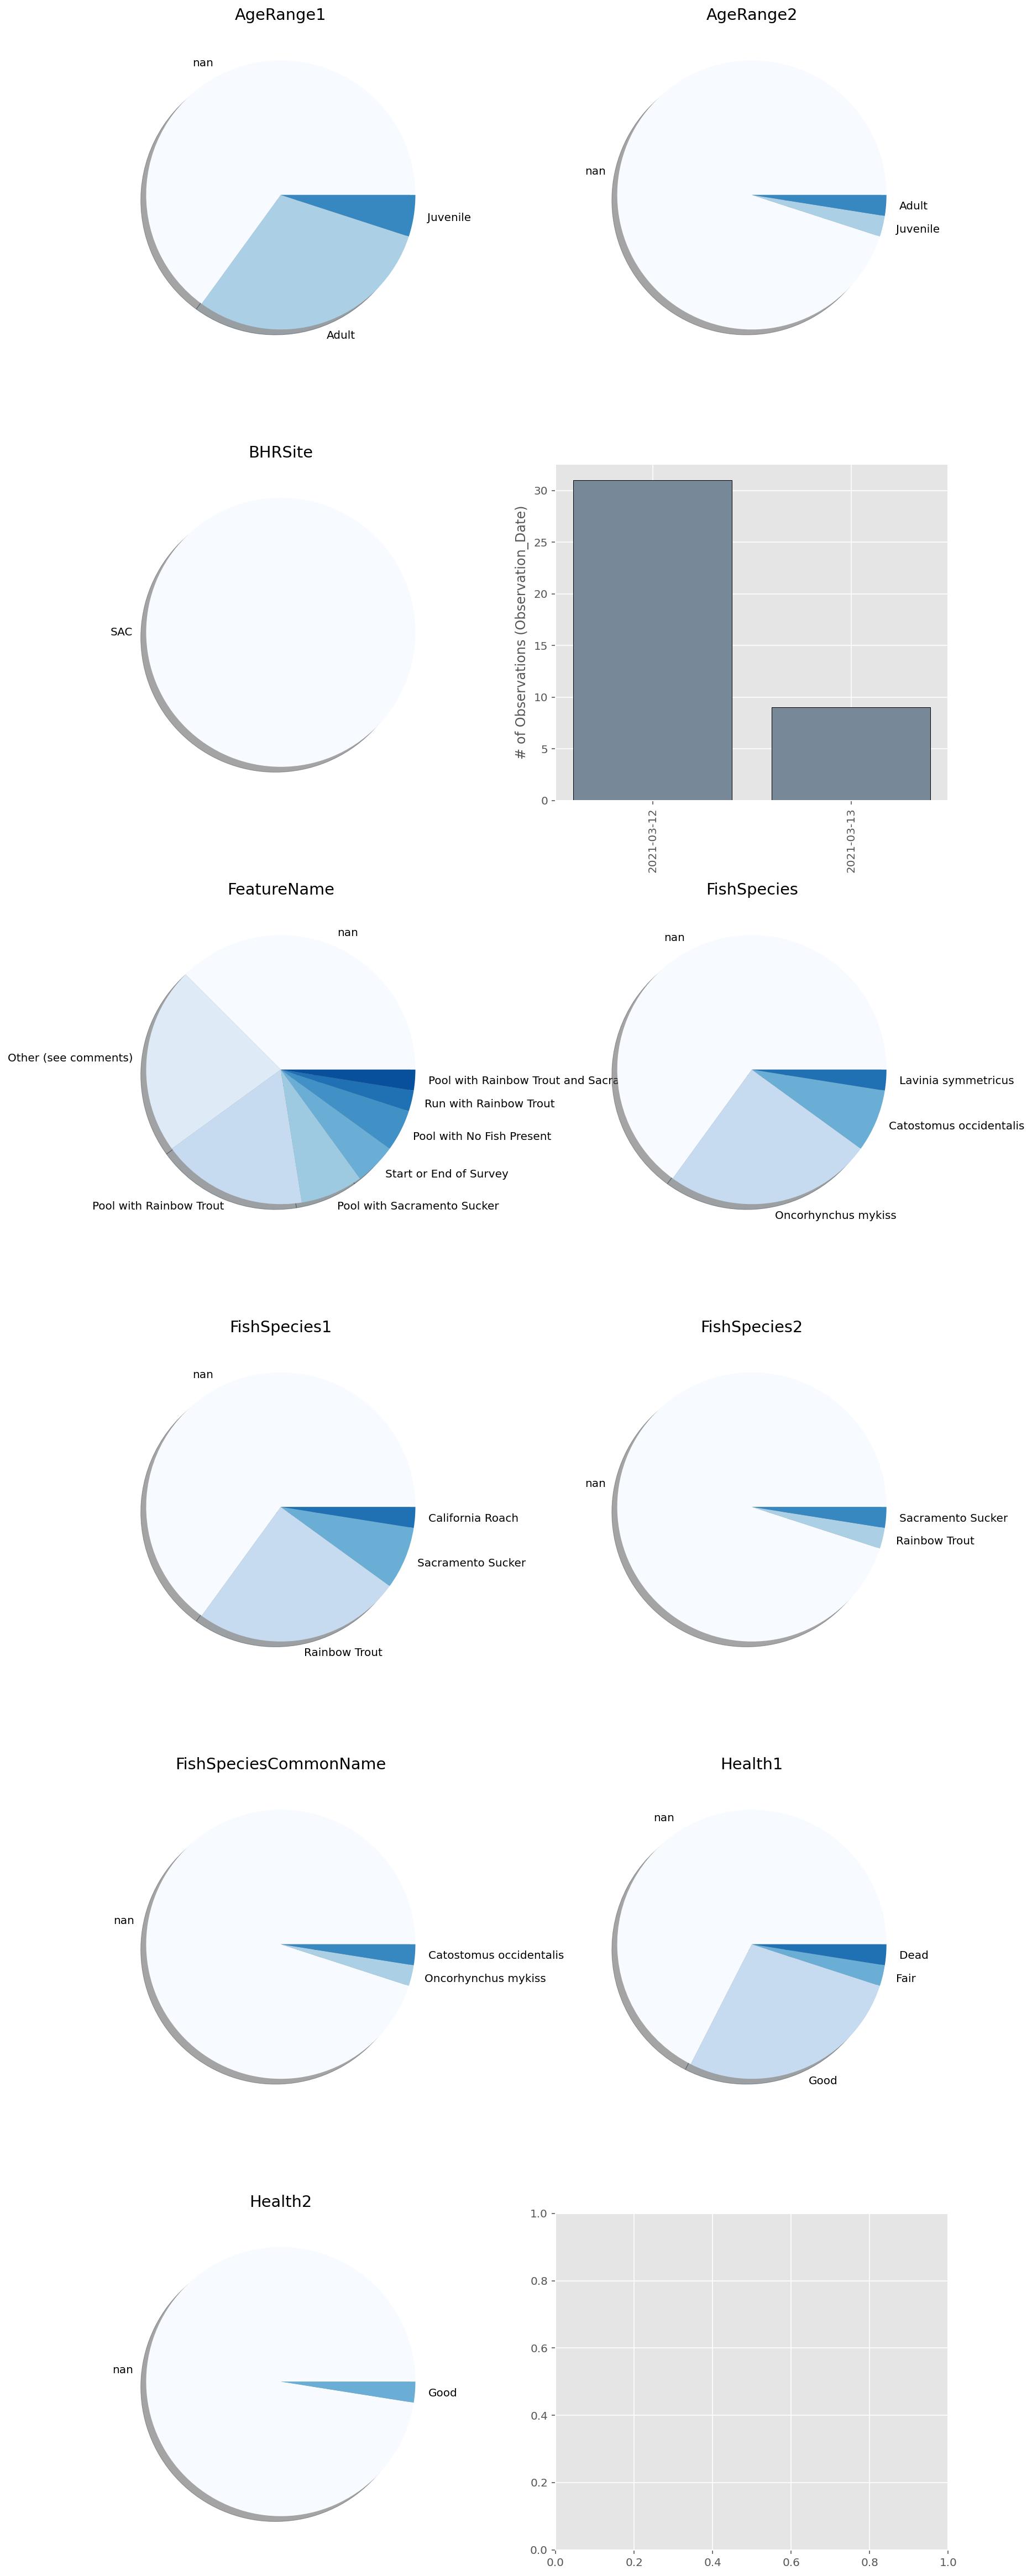

In [10]:
QAQC_plot(sub, ['AgeRange1','AgeRange2','BHRSite','Observation_Date','FeatureName','FishSpecies','FishSpecies1','FishSpecies2','FishSpeciesCommonName','Health1','Health2'])

CurrentFlowRate  Outlier: False
MeasuredCreekFlow  Outlier: False
PoolDepth  Outlier: False
PoolLength  Outlier: False
PoolWidth  Outlier: False
Quantity1  Outlier: True
See Outlier Entries Below:


,OBJECTID,Observation_Date,Surveyor1,Surveyor2,FeatureDescription,BarrierType,MeasuredBarrierHeight,MeasuredWaterDepth,FishSpecies1,Quantity1,AgeRange1,Health1,PhysicalBehavior1,FishSpecies2,Quantity2,AgeRange2,Health2,PhysicalBehavior2,MeasuredCreekFlow,VerticalDrop,HorizontalDistance,WaterDepthTakeoff,WaterDepthLanding,CurrentFlowRate,SizeClass1,SizeClass2,OverallRec,OtherBarrierType,GlobalID,BHRSite,FeatureName,FishSpecies,FishSpeciesCommonName,PoolLength,PoolWidth,PoolDepth,Comments2,Surveyor3,SHAPE,CurrentFlowRate_Outlier,MeasuredCreekFlow_Outlier,PoolDepth_Outlier,PoolLength_Outlier,PoolWidth_Outlier,Quantity1_Outlier
153,172,2021-03-13 00:35:03,Kevin Sherrill,Brian Creeks,None,None,None,None,Sacramento Sucker,2.0,Adult,Good,"Under root wad, not moving.",None,NaN,None,None,None,NaN,None,None,None,None,NaN,None,None,None,None,0f4836fe-c6d4-4fca-af10-258b61a607ed,SAC,Pool with Sacramento Sucker,Catostomus occidentalis,None,35.0,12.0,2.25,None,Patrick Kobernus,"{""x"": 6183831.088135143, ""y"": 2037038.6399472414, ""spatialReferenc...",False,False,False,False,False,True
174,193,2021-03-13 00:41:35,Brian Creeks,Kevin Sherrill,Pool in glide.,None,None,None,Sacramento Sucker,2.0,Adult,Good,At least 2 Sacramento suckers making splashing noises under cover ...,None,NaN,None,None,None,NaN,None,None,None,None,NaN,None,None,None,None,566a4f33-60d8-49ca-bda2-05a3233107cb,SAC,Pool with Sacramento Sucker,Catostomus occidentalis,None,20.0,9.0,1.25,At least 2 Sacramento suckers under thatch-covered bank undercut.,Patrick Kobernus,"{""x"": 6183607.526051414, ""y"": 2037181.5573438674, ""spatialReferenc...",False,False,False,False,False,True


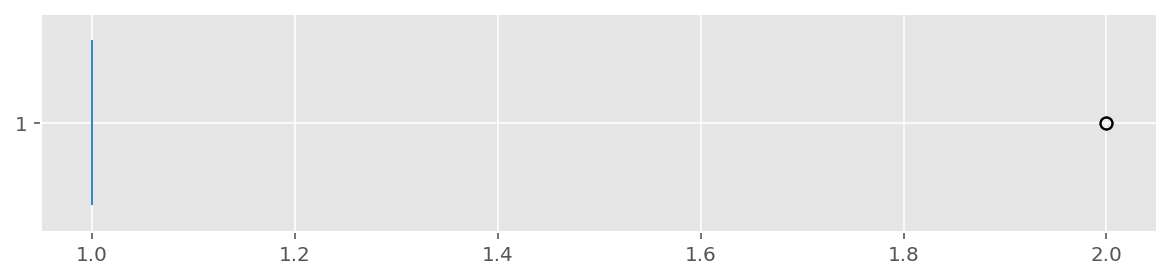

Quantity2  Outlier: False


In [11]:
foo = find_outlier(sub, ['CurrentFlowRate','MeasuredCreekFlow','PoolDepth','PoolLength','PoolWidth','Quantity1','Quantity2'])

In [12]:
#Check for 0s in quantity1
display(data.loc[data.Quantity1 == 0,:])

,OBJECTID,Observation_Date,Surveyor1,Surveyor2,FeatureDescription,BarrierType,MeasuredBarrierHeight,MeasuredWaterDepth,FishSpecies1,Quantity1,AgeRange1,Health1,PhysicalBehavior1,FishSpecies2,Quantity2,AgeRange2,Health2,PhysicalBehavior2,MeasuredCreekFlow,VerticalDrop,HorizontalDistance,WaterDepthTakeoff,WaterDepthLanding,CurrentFlowRate,SizeClass1,SizeClass2,OverallRec,OtherBarrierType,GlobalID,BHRSite,FeatureName,FishSpecies,FishSpeciesCommonName,PoolLength,PoolWidth,PoolDepth,Comments2,Surveyor3,SHAPE


In [13]:
#Check for 0s in quantity2, consider removing.
display(data.loc[data.Quantity2 == 0,:])

,OBJECTID,Observation_Date,Surveyor1,Surveyor2,FeatureDescription,BarrierType,MeasuredBarrierHeight,MeasuredWaterDepth,FishSpecies1,Quantity1,AgeRange1,Health1,PhysicalBehavior1,FishSpecies2,Quantity2,AgeRange2,Health2,PhysicalBehavior2,MeasuredCreekFlow,VerticalDrop,HorizontalDistance,WaterDepthTakeoff,WaterDepthLanding,CurrentFlowRate,SizeClass1,SizeClass2,OverallRec,OtherBarrierType,GlobalID,BHRSite,FeatureName,FishSpecies,FishSpeciesCommonName,PoolLength,PoolWidth,PoolDepth,Comments2,Surveyor3,SHAPE


Text(0, 0.5, 'Pool Depth')

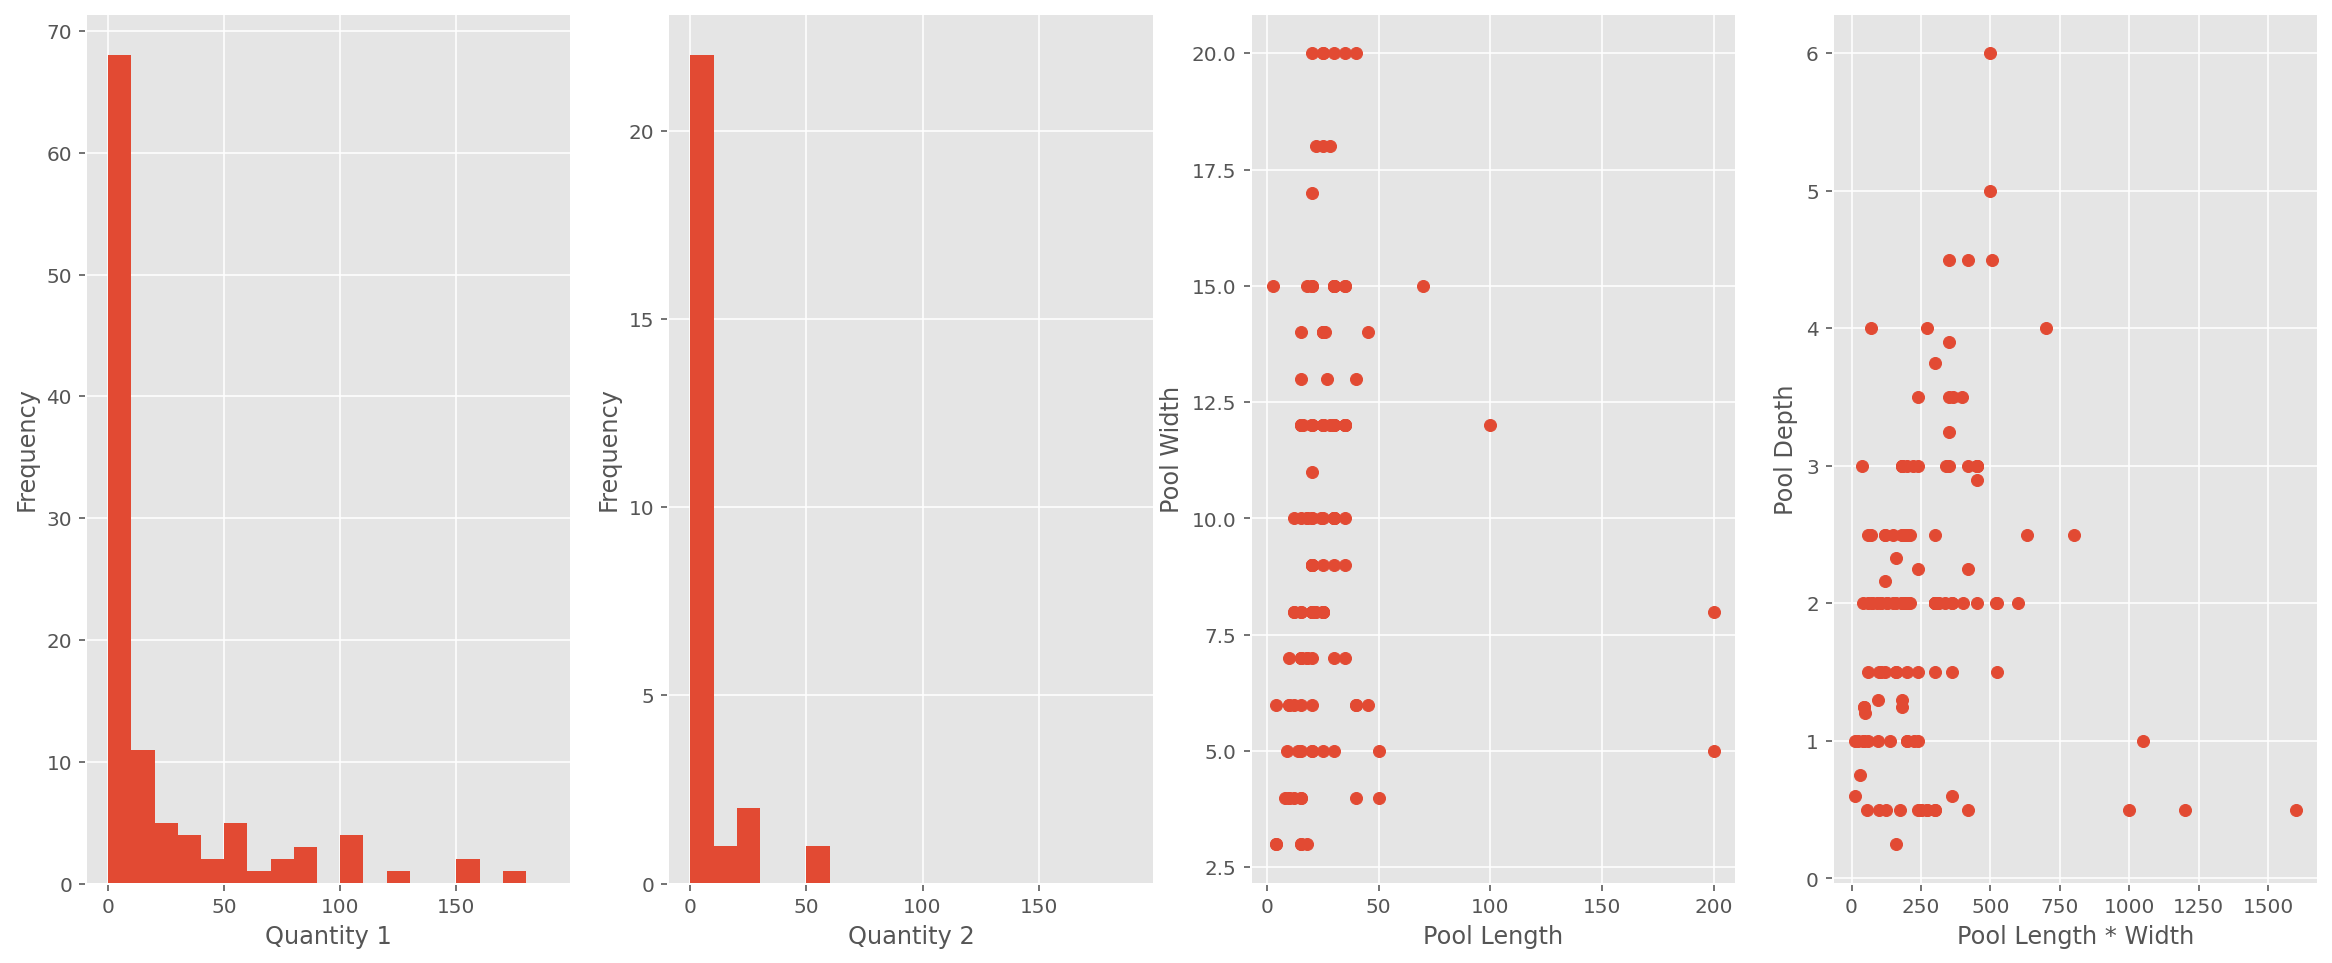

In [14]:
#QAQC - Visualize

fig, axs = plt.subplots(1, 4, figsize=(20, 8))

axs[0].hist(data.Quantity1, bins=range(0,200,10))
axs[0].set_xlabel('Quantity 1')
axs[0].set_ylabel('Frequency')

axs[1].hist(data.Quantity2, bins=range(0,200,10))
axs[1].set_xlabel('Quantity 2')
axs[1].set_ylabel('Frequency')

axs[2].scatter(data.PoolLength,data.PoolWidth)
axs[2].set_xlabel('Pool Length')
axs[2].set_ylabel('Pool Width')

axs[3].scatter(data.PoolLength*data.PoolWidth, data.PoolDepth)
axs[3].set_xlabel('Pool Length * Width')
axs[3].set_ylabel('Pool Depth')


Text(0.5, 1.0, 'Sacramento Sucker')

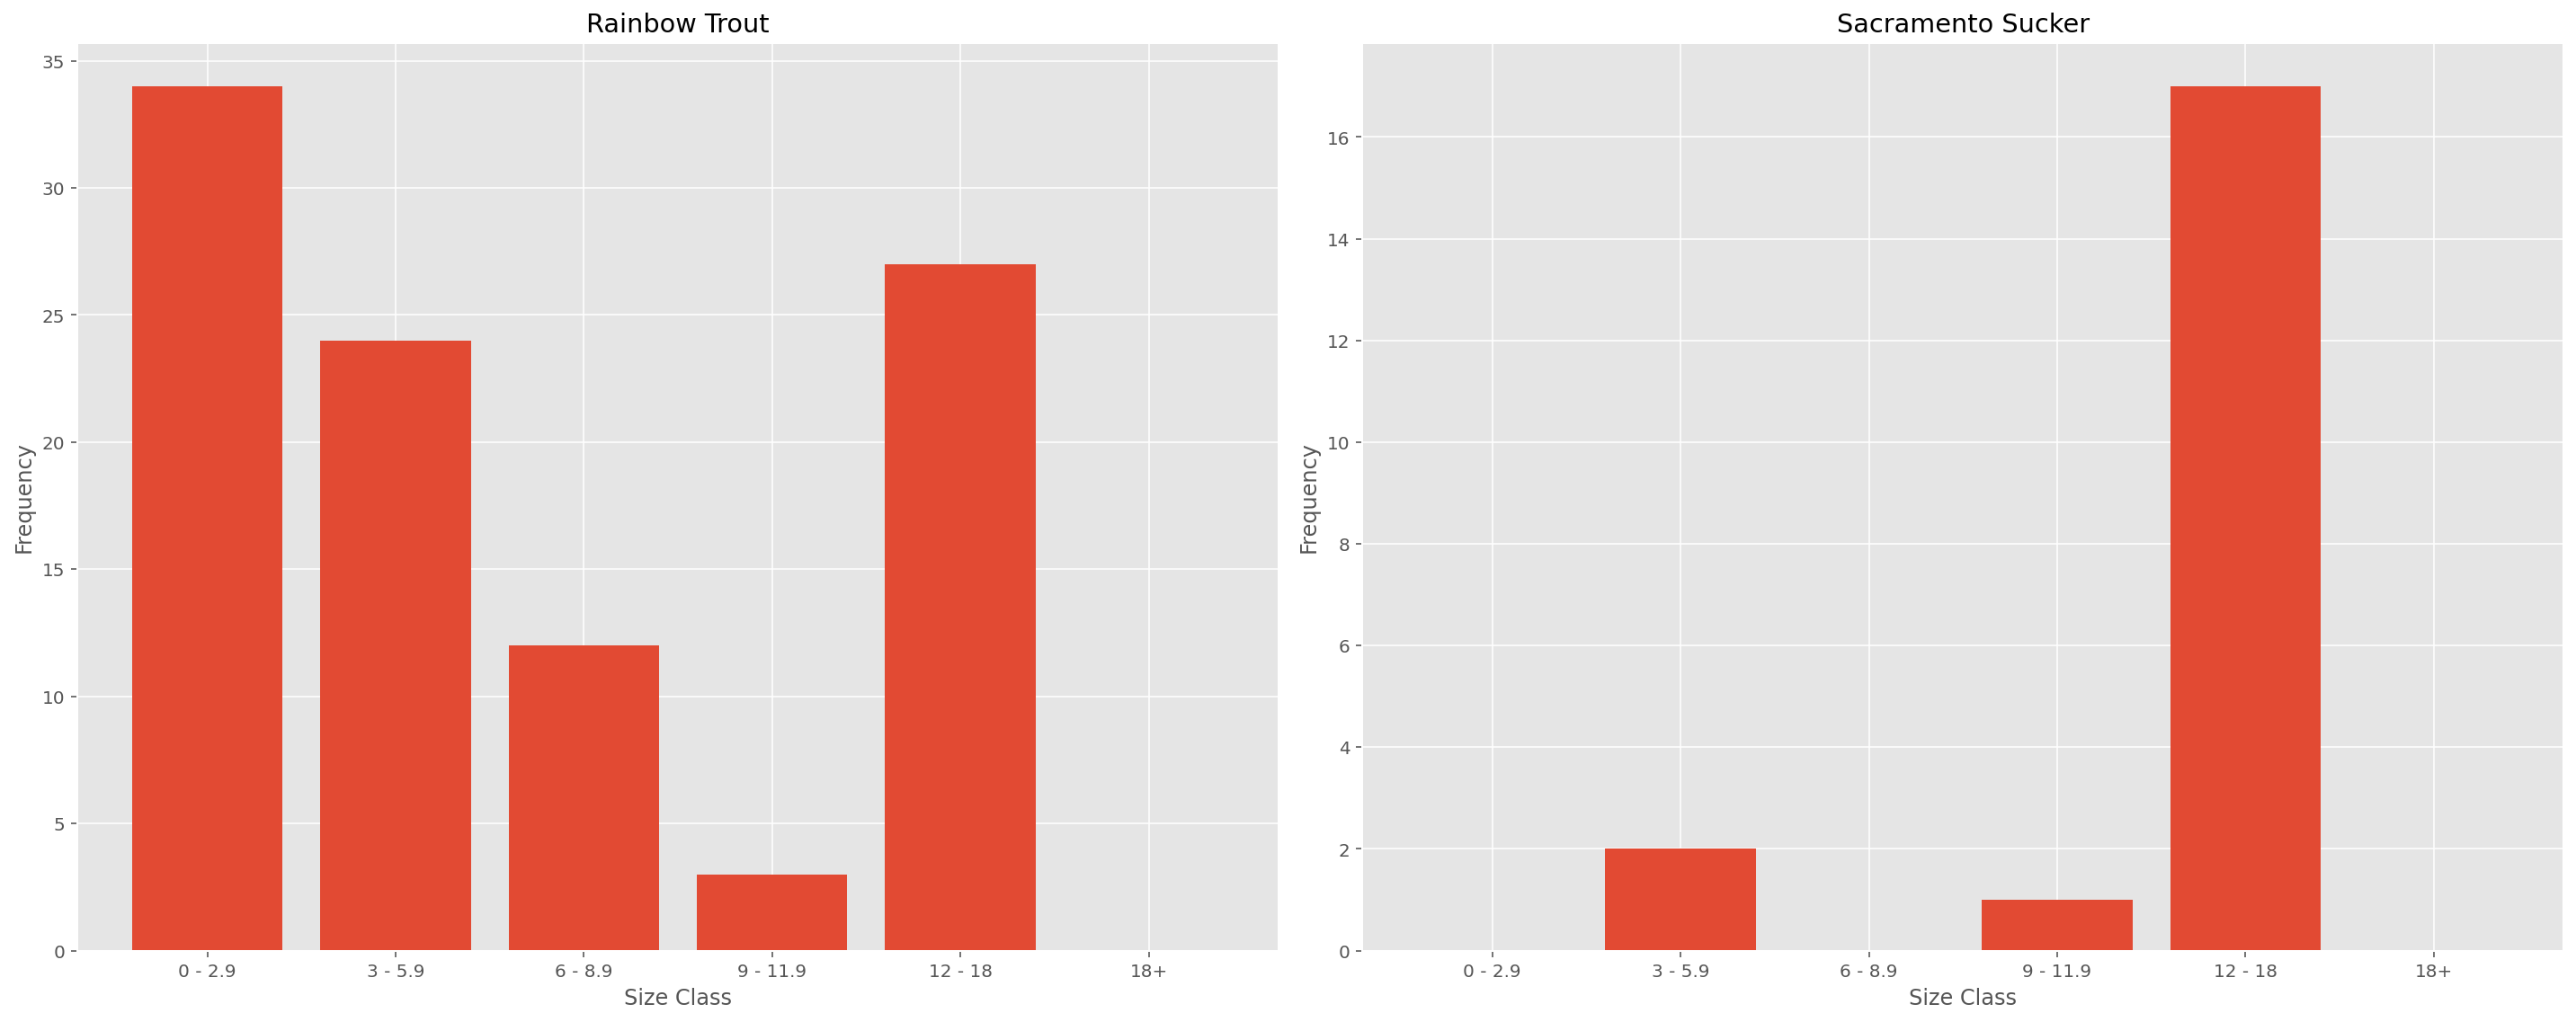

In [15]:
#QAQC Check for Outliers
#Subset data
# TODO: subset by age class
subRT =  data.loc[data.FishSpecies1 == "Rainbow Trout",'SizeClass1']
subRT2 = data.loc[data.FishSpecies2 == "Rainbow Trout",'SizeClass2']
subRT = subRT.append(subRT2)

subSS =  data.loc[data.FishSpecies1 == "Sacramento Sucker",'SizeClass1']
subSS2 = data.loc[data.FishSpecies2 == "Sacramento Sucker",'SizeClass2']
subSS = subSS.append(subSS2)

#Reorder series
RT = subRT.value_counts().reindex(index = ['0 - 2.9','3 - 5.9','6 - 8.9','9 - 11.9','12 - 18','18+']).fillna(0)
SS = subSS.value_counts().reindex(index = ['0 - 2.9','3 - 5.9','6 - 8.9','9 - 11.9','12 - 18','18+']).fillna(0)

#Plot
fig, axs = plt.subplots(1, 2, tight_layout=True, figsize=(20, 8))
axs[0].bar(RT.index,RT)
axs[0].set_xlabel('Size Class')
axs[0].set_ylabel('Frequency')
axs[0].set_title('Rainbow Trout')

axs[1].bar(SS.index,SS)
axs[1].set_xlabel('Size Class')
axs[1].set_ylabel('Frequency')
axs[1].set_title('Sacramento Sucker')




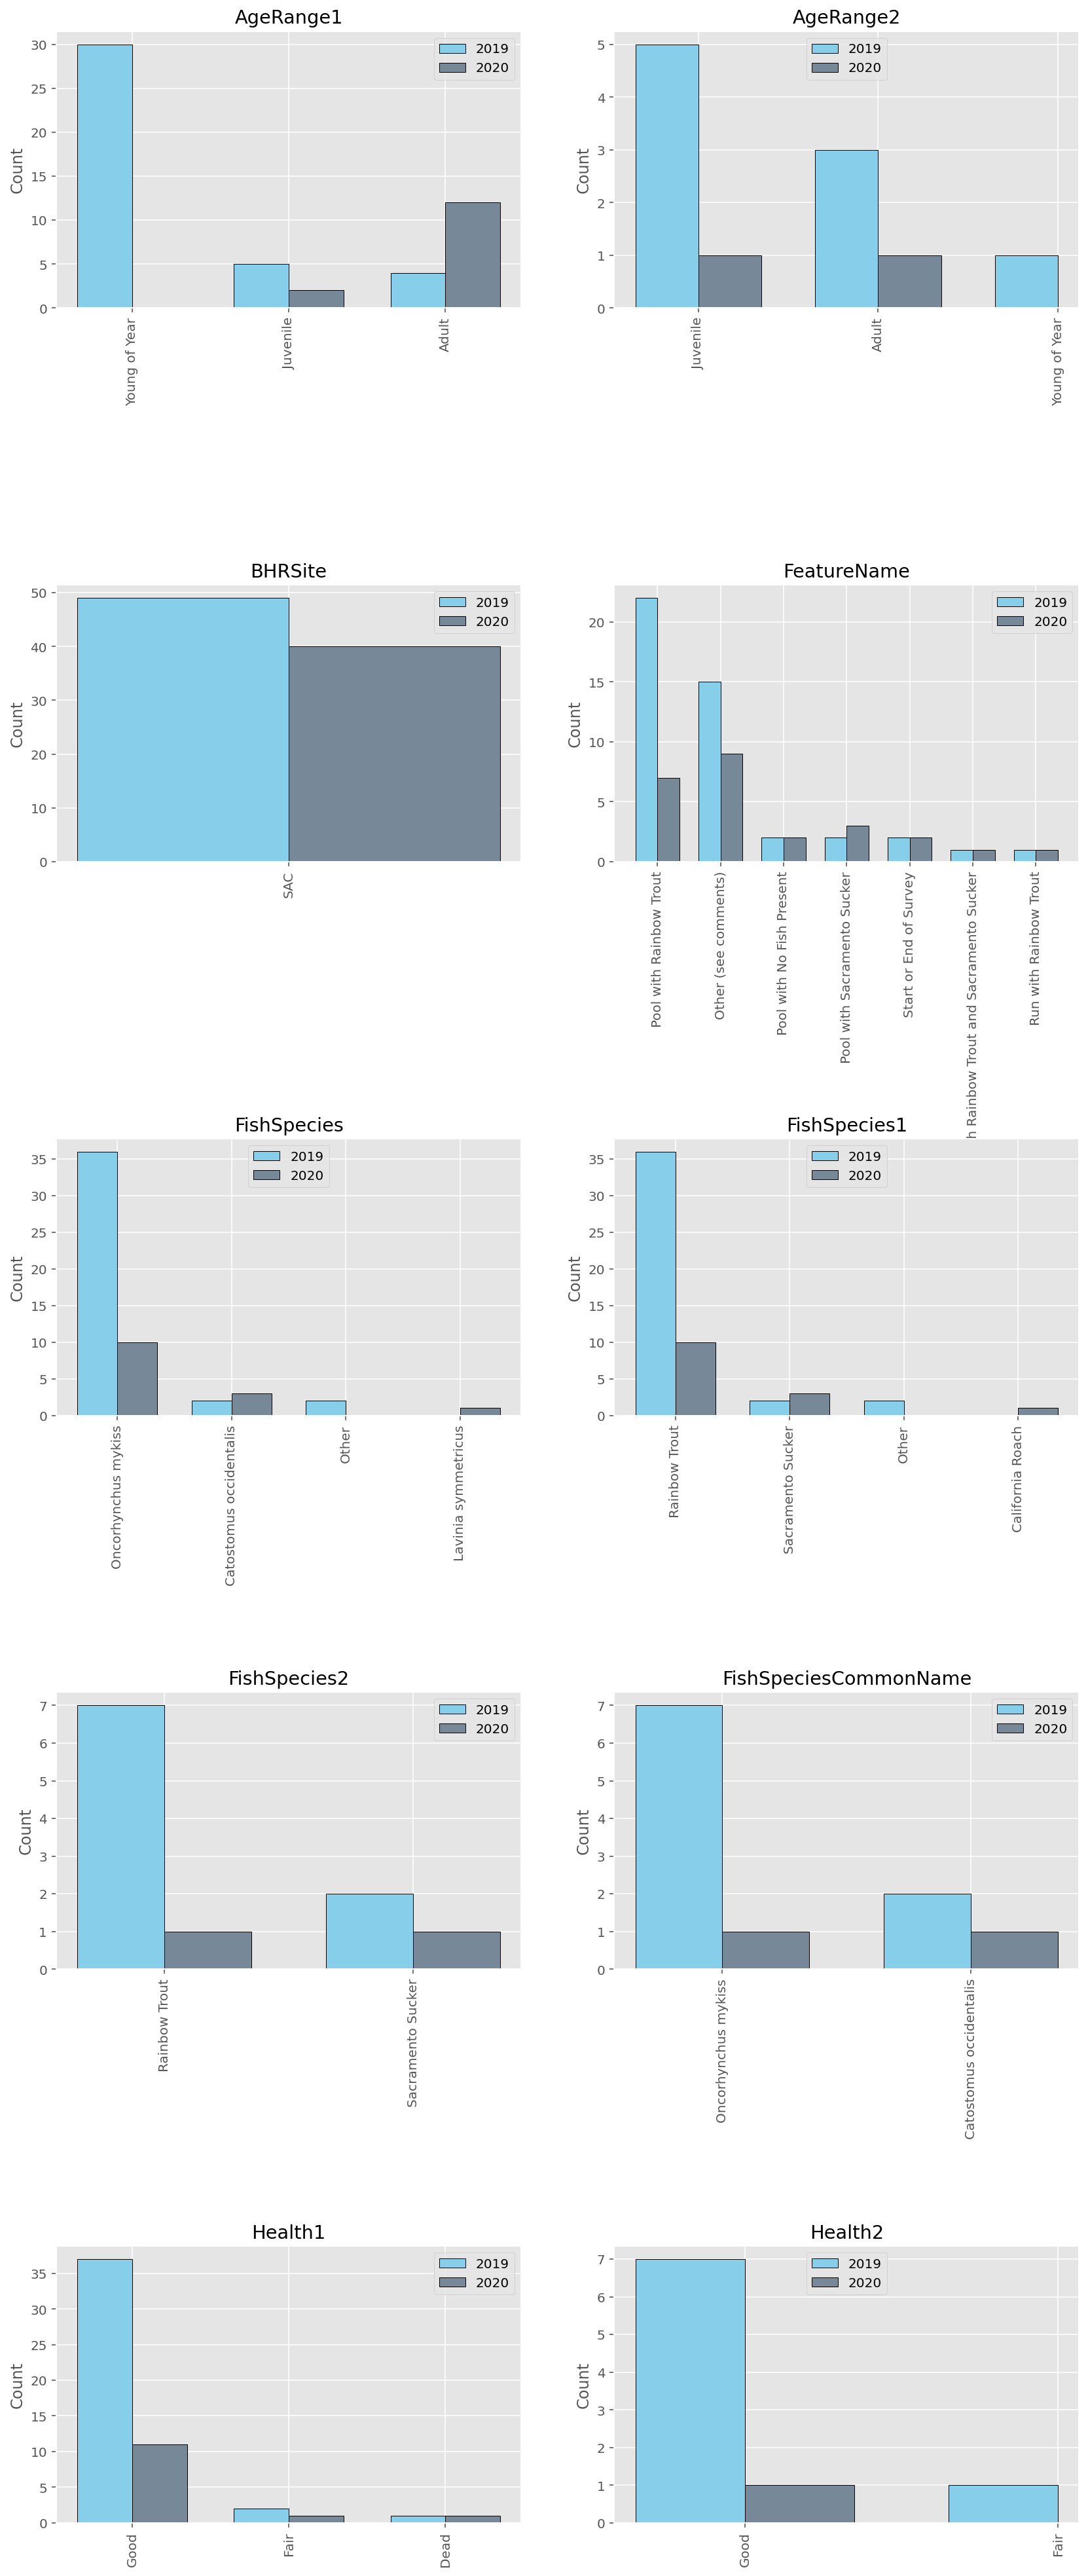

In [16]:
cols = ['AgeRange1','AgeRange2','BHRSite','FeatureName','FishSpecies','FishSpecies1','FishSpecies2','FishSpeciesCommonName','Health1','Health2']
compare_years_catagorical(data, cols, '2019', '2020')

In [17]:
data.columns

Index(['OBJECTID', 'Observation_Date', 'Surveyor1', 'Surveyor2',
       'FeatureDescription', 'BarrierType', 'MeasuredBarrierHeight',
       'MeasuredWaterDepth', 'FishSpecies1', 'Quantity1', 'AgeRange1',
       'Health1', 'PhysicalBehavior1', 'FishSpecies2', 'Quantity2',
       'AgeRange2', 'Health2', 'PhysicalBehavior2', 'MeasuredCreekFlow',
       'VerticalDrop', 'HorizontalDistance', 'WaterDepthTakeoff',
       'WaterDepthLanding', 'CurrentFlowRate', 'SizeClass1', 'SizeClass2',
       'OverallRec', 'OtherBarrierType', 'GlobalID', 'BHRSite', 'FeatureName',
       'FishSpecies', 'FishSpeciesCommonName', 'PoolLength', 'PoolWidth',
       'PoolDepth', 'Comments2', 'Surveyor3', 'SHAPE'],
      dtype='object')

In [3]:
QAQC_attachment_filenames(feature_service)

Found mislabeled photo attachement(s):
SAC_Fish_Passage
Object ID: 15  Current Name:  Photo2.jpg
Object ID: 15  Current Name:  Photo6.jpg
Object ID: 15  Current Name:  Photo7.jpg
Object ID: 15  Current Name:  Photo8.jpg
Object ID: 15  Current Name:  Photo9.jpg
Object ID: 15  Current Name:  Photo10.jpg
Object ID: 16  Current Name:  Photo1.jpg
Object ID: 16  Current Name:  Photo2.jpg
Object ID: 16  Current Name:  Photo3.jpg
Object ID: 16  Current Name:  Photo4.jpg
Object ID: 16  Current Name:  Photo5.jpg
Object ID: 16  Current Name:  Photo6.jpg
Object ID: 16  Current Name:  Photo7.jpg
Object ID: 17  Current Name:  Photo1.jpg
Object ID: 17  Current Name:  Photo2.jpg


Object ID: 18  Current Name:  Photo1.jpg
Object ID: 18  Current Name:  Photo2.jpg
Object ID: 19  Current Name:  Photo1.jpg


Object ID: 20  Current Name:  Photo1.jpg
Object ID: 20  Current Name:  Photo2.jpg
Object ID: 21  Current Name:  Photo1.jpg
Object ID: 21  Current Name:  Photo2.jpg
Object ID: 21  Current Name:  Photo4.jpg
Object ID: 21  Current Name:  Photo5.jpg
Object ID: 21  Current Name:  Photo6.jpg


Object ID: 22  Current Name:  Photo6.jpg
Object ID: 22  Current Name:  Photo7.jpg
Object ID: 23  Current Name:  Photo1.jpg
Object ID: 23  Current Name:  Photo2.jpg
Object ID: 23  Current Name:  Photo3.jpg
Object ID: 24  Current Name:  Photo1.jpg
Object ID: 24  Current Name:  Photo2.jpg
Object ID: 24  Current Name:  Photo3.jpg
Object ID: 24  Current Name:  Photo4.jpg
Object ID: 24  Current Name:  Photo5.jpg


Object ID: 25  Current Name:  Photo1.jpg
Object ID: 26  Current Name:  Photo1.jpg
Object ID: 26  Current Name:  Photo2.jpg
Object ID: 27  Current Name:  Photo1.jpg
Object ID: 27  Current Name:  Photo2.jpg
Object ID: 27  Current Name:  Photo3.jpg
Object ID: 27  Current Name:  Photo4.jpg


Object ID: 28  Current Name:  Photo1.jpg
Object ID: 28  Current Name:  Photo2.jpg
Object ID: 28  Current Name:  Photo3.jpg
Object ID: 28  Current Name:  Photo4.jpg
Object ID: 28  Current Name:  Photo5.jpg
Object ID: 28  Current Name:  Photo6.jpg
Object ID: 29  Current Name:  Photo1.jpg
Object ID: 29  Current Name:  Photo2.jpg
Object ID: 29  Current Name:  Photo3.jpg
Object ID: 29  Current Name:  Photo4.jpg
Object ID: 29  Current Name:  Photo5.jpg
Object ID: 29  Current Name:  Photo6.jpg
Object ID: 30  Current Name:  Photo1.jpg
Object ID: 30  Current Name:  Photo2.jpg


Object ID: 31  Current Name:  Photo1.jpg
Object ID: 31  Current Name:  Photo2.jpg
Object ID: 31  Current Name:  Photo3.jpg
Object ID: 31  Current Name:  Photo4.jpg
Object ID: 31  Current Name:  Photo5.jpg
Object ID: 31  Current Name:  Photo6.jpg
Object ID: 32  Current Name:  Photo1.jpg
Object ID: 32  Current Name:  Photo2.jpg
Object ID: 32  Current Name:  Photo3.jpg
Object ID: 32  Current Name:  Photo4.jpg
Object ID: 33  Current Name:  Photo1.jpg
Object ID: 33  Current Name:  Photo2.jpg
Object ID: 33  Current Name:  Photo3.jpg


Object ID: 34  Current Name:  Photo3.jpg
Object ID: 34  Current Name:  Photo4.jpg
Object ID: 34  Current Name:  Photo5.jpg
Object ID: 34  Current Name:  Photo6.jpg
Object ID: 34  Current Name:  Photo7.jpg
Object ID: 34  Current Name:  Photo8.jpg
Object ID: 34  Current Name:  Photo9.jpg
Object ID: 35  Current Name:  Photo1.jpg
Object ID: 35  Current Name:  Photo2.jpg
Object ID: 35  Current Name:  Photo3.jpg
Object ID: 35  Current Name:  Photo4.jpg
Object ID: 35  Current Name:  Photo5.jpg
Object ID: 35  Current Name:  Photo6.jpg


Object ID: 41  Current Name:  Photo1.jpg
Object ID: 41  Current Name:  Photo2.jpg
Object ID: 42  Current Name:  Photo2.jpg
Object ID: 43  Current Name:  Photo1.jpg
Object ID: 43  Current Name:  Photo2.jpg


Object ID: 44  Current Name:  Photo2.jpg
Object ID: 45  Current Name:  Photo2.jpg
Object ID: 46  Current Name:  Photo1.jpg
Object ID: 46  Current Name:  Photo2.jpg
Object ID: 46  Current Name:  Photo3.jpg


Object ID: 47  Current Name:  Photo1.jpg
Object ID: 47  Current Name:  Photo2.jpg
Object ID: 48  Current Name:  Photo1.jpg
Object ID: 48  Current Name:  Photo2.jpg
Object ID: 49  Current Name:  Photo1.jpg
Object ID: 49  Current Name:  Photo2.jpg


Object ID: 50  Current Name:  Photo1.jpg
Object ID: 52  Current Name:  Photo1.jpg
Object ID: 52  Current Name:  Photo2.jpg
Object ID: 52  Current Name:  Photo3.jpg
Object ID: 52  Current Name:  Photo4.jpg


Object ID: 53  Current Name:  Photo1.jpg
Object ID: 53  Current Name:  Photo2.jpg


In [4]:
print("Fish Species 1 unique values:",sub.FishSpecies1.unique())
print("Age Range 1 unique values:",sub.AgeRange1.unique())

print("Sacramento Sucker age classes:",sub.loc[sub.FishSpecies1=="Sacramento Sucker","AgeRange1"].unique())
print("Rainbow Trout age classes:",sub.loc[sub.FishSpecies1=="Rainbow Trout","AgeRange1"].unique())


print("\n\nFish Species 2 unique values:",sub.FishSpecies2.unique())
print("Age Range 2 unique values:",sub.AgeRange2.unique())
print("Sacramento Sucker age classes:",sub.loc[sub.FishSpecies2=="Sacramento Sucker","AgeRange2"].unique())
print("Rainbow Trout age classes:",sub.loc[sub.FishSpecies2=="Rainbow Trout","AgeRange2"].unique())

NameError: name 'sub' is not defined

# Results

In [20]:
#### Fish Passage - aggregate data

#Rainbow trout, young of the year
entry1 = np.where((sub.FishSpecies1 == "Rainbow Trout") & (sub.AgeRange1 == "Young of Year"),sub.Quantity1,0)
entry2 = np.where((sub.FishSpecies2 == "Rainbow Trout") & (sub.
                                                           AgeRange2 == "Young of Year"),sub.Quantity2,0)
sub.loc[:,"RT_YoungOfYear"] = entry1 + entry2

#Rainbow trout, Juvenile
entry1 = np.where((sub.FishSpecies1 == "Rainbow Trout") & (sub.AgeRange1 == "Juvenile"),sub.Quantity1,0)
entry2 = np.where((sub.FishSpecies2 == "Rainbow Trout") & (sub.AgeRange2 == "Juvenile"),sub.Quantity2,0)
sub.loc[:,"RT_Juvenile"] = entry1 + entry2

#Rainbow trout, Adult
entry1 = np.where((sub.FishSpecies1 == "Rainbow Trout") & (sub.AgeRange1 == "Adult"),sub.Quantity1,0)
entry2 = np.where((sub.FishSpecies2 == "Rainbow Trout") & (sub.AgeRange2 == "Adult"),sub.Quantity2,0)
sub.loc[:,"RT_Adult"] = entry1 + entry2

#Sacramento Sucker, Young of the Year
entry1 = np.where((sub.FishSpecies1 == "Sacramento Sucker") & (sub.AgeRange1 == "Young of Year"),sub.Quantity1,0)
entry2 = np.where((sub.FishSpecies2 == "Sacramento Sucker") & (sub.AgeRange2 == "Young of Year"),sub.Quantity2,0)
sub.loc[:,"SS_YoungOfYear"] = entry1 + entry2

#Sacramento Sucker, Juvenile
entry1 = np.where((sub.FishSpecies1 == "Sacramento Sucker") & (sub.AgeRange1 == "Juvenile"),sub.Quantity1,0)
entry2 = np.where((sub.FishSpecies2 == "Sacramento Sucker") & (sub.AgeRange2 == "Juvenile"),sub.Quantity2,0)
sub.loc[:,"SS_Juvenile"] = entry1 + entry2

#Sacramento Sucker, Adults
entry1 = np.where((sub.FishSpecies1 == "Sacramento Sucker") & (sub.AgeRange1 == "Adult"),sub.Quantity1,0)
entry2 = np.where((sub.FishSpecies2 == "Sacramento Sucker") & (sub.AgeRange2 == "Adult"),sub.Quantity2,0)
sub.loc[:,"SS_Adult"] = entry1 + entry2


/usr/local/lib/python3.8/dist-packages/pandas/core/indexing.py:1667: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[key] = value


In [21]:
#Summary Stats

print('Rainbow Trout Total Count:',sub.RT_YoungOfYear.sum() + sub.RT_Juvenile.sum() + sub.RT_Adult.sum())
print('Rainbow Trout Adult Count:',sub.RT_Adult.sum())
print('Rainbow Trout Juvenile Count:',sub.RT_Juvenile.sum())
print('Rainbow Trout Young of Year Count:',sub.RT_YoungOfYear.sum())

print('\nSacramento Sucker Total Count:',sub.SS_YoungOfYear.sum() + sub.SS_Juvenile.sum() + sub.SS_Adult.sum())
print('Sacramento Sucker Adult Count:',sub.SS_Adult.sum())
print('Sacramento Sucker Juvenile Count:',sub.SS_Juvenile.sum())
print('Sacramento Sucker Young of Year Count:',sub.SS_YoungOfYear.sum())

Rainbow Trout Total Count: 11.0
Rainbow Trout Adult Count: 8.0
Rainbow Trout Juvenile Count: 3.0
Rainbow Trout Young of Year Count: 0.0

Sacramento Sucker Total Count: 25.0
Sacramento Sucker Adult Count: 25.0
Sacramento Sucker Juvenile Count: 0.0
Sacramento Sucker Young of Year Count: 0.0


In [22]:
# Pool size summary
print('Number of pool depths:',sub.PoolDepth.count())
print('Pool depth mean (ft):',round(sub.PoolDepth.mean(),2))
print('Pool depth standard deviation (ft):',round(sub.PoolDepth.std(),2))

Number of pool depths: 20
Pool depth mean (ft): 1.86
Pool depth standard deviation (ft): 1.06


# Export data for result table in report

In [23]:
sub.loc[:,'Observation_Date_PDT'] = sub.Observation_Date - timedelta(hours=7)
sub.loc[:,'Observation_Day'] = sub['Observation_Date_PDT'].dt.strftime('%Y-%m-%d')
sub.loc[:,'Observation_Time'] = sub['Observation_Date_PDT'].dt.strftime('%H:%M')

In [24]:
sub = sub.sort_values('Observation_Date')

In [25]:
field_order = ['Observation_Day','Observation_Time','OBJECTID','RT_YoungOfYear','RT_Juvenile', 'RT_Adult','SS_Adult', 'FeatureDescription','Comments2']

In [26]:
sub[field_order].to_excel('Outputs/Fish_Passage_Data_For_Report.xlsx', index=False)

# Export Excel Data Deliverable

In [27]:
data.columns

Index(['OBJECTID', 'Observation_Date', 'Surveyor1', 'Surveyor2',
       'FeatureDescription', 'BarrierType', 'MeasuredBarrierHeight',
       'MeasuredWaterDepth', 'FishSpecies1', 'Quantity1', 'AgeRange1',
       'Health1', 'PhysicalBehavior1', 'FishSpecies2', 'Quantity2',
       'AgeRange2', 'Health2', 'PhysicalBehavior2', 'MeasuredCreekFlow',
       'VerticalDrop', 'HorizontalDistance', 'WaterDepthTakeoff',
       'WaterDepthLanding', 'CurrentFlowRate', 'SizeClass1', 'SizeClass2',
       'OverallRec', 'OtherBarrierType', 'GlobalID', 'BHRSite', 'FeatureName',
       'FishSpecies', 'FishSpeciesCommonName', 'PoolLength', 'PoolWidth',
       'PoolDepth', 'Comments2', 'Surveyor3', 'SHAPE'],
      dtype='object')

In [28]:
field_order = [
'BHRSite', 
'Observation_Date', 
'Surveyor1', 
'Surveyor2', 
'Surveyor3',
'FishSpecies1',
'FishSpecies', 
'Quantity1',    
'SizeClass1',
'AgeRange1',
'Health1',
'PhysicalBehavior1',    
'FishSpecies2',
'FishSpeciesCommonName',
'Quantity2',
'SizeClass2',
'AgeRange2', 
'Health2', 
'PhysicalBehavior2',
'FeatureName',
'FeatureDescription', 
'PoolDepth',    
'PoolWidth',
'PoolLength',
'BarrierType',
'OtherBarrierType',
'MeasuredBarrierHeight',
'MeasuredCreekFlow', 
'MeasuredWaterDepth',
'VerticalDrop',
'HorizontalDistance',
'WaterDepthTakeoff',
'WaterDepthLanding', 
'CurrentFlowRate',
'OverallRec', 
'Comments2', 
'OBJECTID',    
'GlobalID', 
'SHAPE']

In [29]:
export_data_deliverable(data, feature_service, field_order)

No Related Table Found


Exported to Outputs/SAC_Fish_Passage_Data_20211025.xlsx
